Diabetes dataset is one of the datasets available in sklearn. The diabetes dataset consists of 10 physiological variables (age, sex, weight, blood pressure) measure on 442 patients, and an indication of disease progression after one year.

You are given a Training dataset csv file with X train and Y train data. As studied in lecture, your task is to come up with Linear Regression training algorithm and thus predictions for the test dataset given.
Read Instructions carefully -

1. Use Linear Regression(in scikit learn) as a training algorithm and submit results predicted by that.

2. Files are in csv format, use genfromtxt function in numpy to load data from csv file. Similarly you can use savetxt function to save data into a file.

3. Submit a csv file with only predictions for X test data. File should not have any headers and should only have one column i.e. predictions.  Also prediction values in file should be upto **5** decimal places.

4. Upon submission of predictions, the score you will get is based on coefficient of determination.


In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

In [2]:
# Loading the dataset
import numpy as np
data = np.loadtxt("training_diabetes.csv", delimiter = ",")
data

array([[-4.91050164e-02, -4.46416365e-02,  1.60854917e-01, ...,
         2.80165065e-02,  1.13486232e-02,  3.46000000e+02],
       [-7.09002471e-02,  5.06801187e-02, -8.91974838e-02, ...,
        -1.29079423e-02, -5.49250874e-02,  1.04000000e+02],
       [ 1.75052192e-03, -4.46416365e-02, -7.08746786e-02, ...,
        -2.25121719e-02,  7.20651633e-03,  4.90000000e+01],
       ...,
       [ 2.35457526e-02, -4.46416365e-02,  7.03187031e-02, ...,
        -1.91970476e-02, -9.36191133e-03,  2.88000000e+02],
       [ 1.62806757e-02,  5.06801187e-02,  7.24743273e-02, ...,
        -2.36445576e-02,  6.10539062e-02,  1.31000000e+02],
       [-9.14709343e-03,  5.06801187e-02, -3.09956318e-02, ...,
         6.20931562e-03,  2.79170509e-02,  4.20000000e+01]])

In [3]:
# Getting the input features
X = data[:,:10]

# Getting the output
Y = data[:,10]

In [4]:
# Shape of the input features 
X.shape

(331, 10)

In [5]:
# Shape of output
Y.shape

(331,)

In [6]:
# Converting the input features into Pandas dataframe to check for string/NaN values
import pandas as pd
df = pd.DataFrame(X)
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,-0.000214,-0.000293,0.000053,-0.001045,-0.001423,-0.001220,0.000440,-0.001473,-0.001594,0.000099
std,0.047207,0.047618,0.048627,0.047621,0.047371,0.046936,0.047303,0.046591,0.048088,0.047263
min,-0.107226,-0.044642,-0.090275,-0.102071,-0.126781,-0.115613,-0.102307,-0.076395,-0.126097,-0.137767
25%,-0.034575,-0.044642,-0.035307,-0.036656,-0.035968,-0.029967,-0.032356,-0.039493,-0.035817,-0.034215
50%,0.005383,-0.044642,-0.008362,-0.005671,-0.004321,-0.004445,-0.006584,-0.002592,-0.005145,-0.001078
75%,0.038076,0.050680,0.030979,0.032775,0.027326,0.028905,0.026550,0.034309,0.032124,0.027917
max,0.110727,0.050680,0.170555,0.132044,0.153914,0.198788,0.181179,0.185234,0.133599,0.135612


In [7]:
# Splitting the data into test and train data (randomly without any bias)
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y)

In [8]:
# Checking the shape of the data (to check the percentage of data taken to train and test the algorithm)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(248, 10)
(83, 10)
(248,)
(83,)


In [9]:
# Using sklearn to import the classifier/algorithm
from sklearn.linear_model import LinearRegression

# Creating the algorithm object that we can use to train and then test the data
alg = LinearRegression()

In [10]:
# Fitting/training the data
alg.fit(X_train, Y_train)

LinearRegression()

In [11]:
# Predicting the output for the test data
Y_pred = alg.predict(X_test)

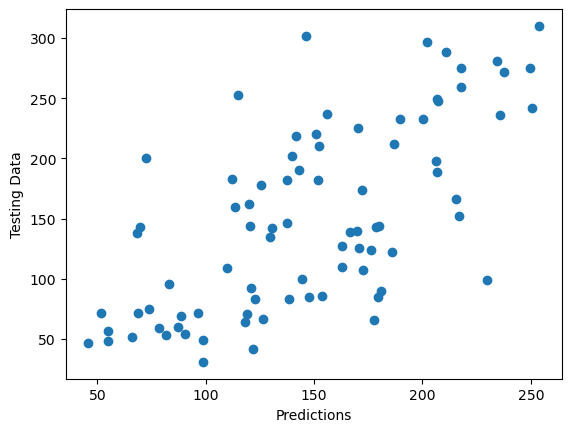

In [12]:
import matplotlib.pyplot as plt
plt.scatter(Y_pred, Y_test)
plt.xlabel("Predictions")
plt.ylabel("Testing Data")
plt.show()

In [13]:
# Finding the scores (Coefficient of Determination) for Training and Testing data
train_score = alg.score(X_train, Y_train)
test_score = alg.score(X_test, Y_test)

print("Train Score :", train_score)
print("Test Score :", test_score)

Train Score : 0.5089587852805604
Test Score : 0.4463136380554942


In [14]:
# Evaluation of the algorithm
X_eval = np.loadtxt("test_diabetes.csv", delimiter = ",")

# Predicting the output for the evaluation data
Y_eval = alg.predict(X_eval)

In [15]:
# Finding the score (Coefficient of Determination) for evaluation data
eval_score = alg.score(X_eval, Y_eval)

print("Evaluation Score :", eval_score)

Evaluation Score : 1.0


In [16]:
# Dumping the output obtained from the evaluation data into a "CSV" file
np.savetxt('Diabetes Prediction.csv', Y_eval, fmt = '%.5f')